 <font size="6"><strong><center>Project 4 - Health Care<center></strong></font>

**Problem statement:**
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 

Dataset description:

|Variable|Description|
| --- | --- |
|Age|Age in years|
|Sex|1 = male; 0 = female|
|cp|Chest pain type|
|trestbps|Resting blood pressure (in mm Hg on admission to the hospital)|
|chol|Serum cholesterol in mg/dl|
|fbs|Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)|
|restecg|Resting electrocardiographic results|
|thalach|Maximum heart rate achieved|
|exang|Exercise induced angina (1 = yes; 0 = no)|
|oldpeak|ST depression induced by exercise relative to rest|
|slope|Slope of the peak exercise ST segment|
|ca|Number of major vessels (0-3) colored by fluoroscopy|
|thal|3 = normal; 6 = fixed defect; 7 = reversible defect|
|Target|1 or 0|



**Task to be performed:**

1. Preliminary analysis:
       a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
       b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy.
2. Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
       a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data.
       b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot.
       c. Study the occurrence of CVD across the Age category.
       d. Study the composition of all patients with respect to the Sex category.
       e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient.
       f. Describe the relationship between cholesterol levels and a target variable.
       g. State what relationship exists between peak exercising and the occurrence of a heart attack.
       h. Check if thalassemia is a major cause of CVD.
       i. List how the other factors determine the occurrence of CVD.
       j. Use a pair plot to understand the relationship between all the given variables.
3. Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("data.xlsx")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# Checking for missing values
data.isnull().sum(axis = 0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# To check for duplicates
data.duplicated().sum()

1

In [9]:
data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We can see that the scale of each feature column is different and varied.

<b><font size="3">Understanding the Data</font></b>

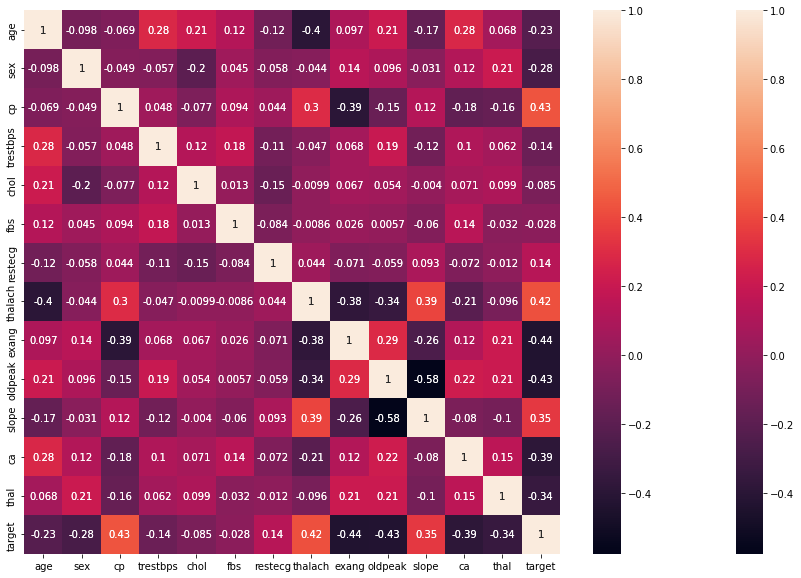

In [11]:
# To check the correlation between variables and identify them calculate correlation matrix
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True)
plt.show()

*From the above HeatMap, we can see that cp and thalach are the features with highest positive correlation whereas exang, oldpeak and ca are negatively correlated.While other features do not hold much correlation with the response variable "target".*

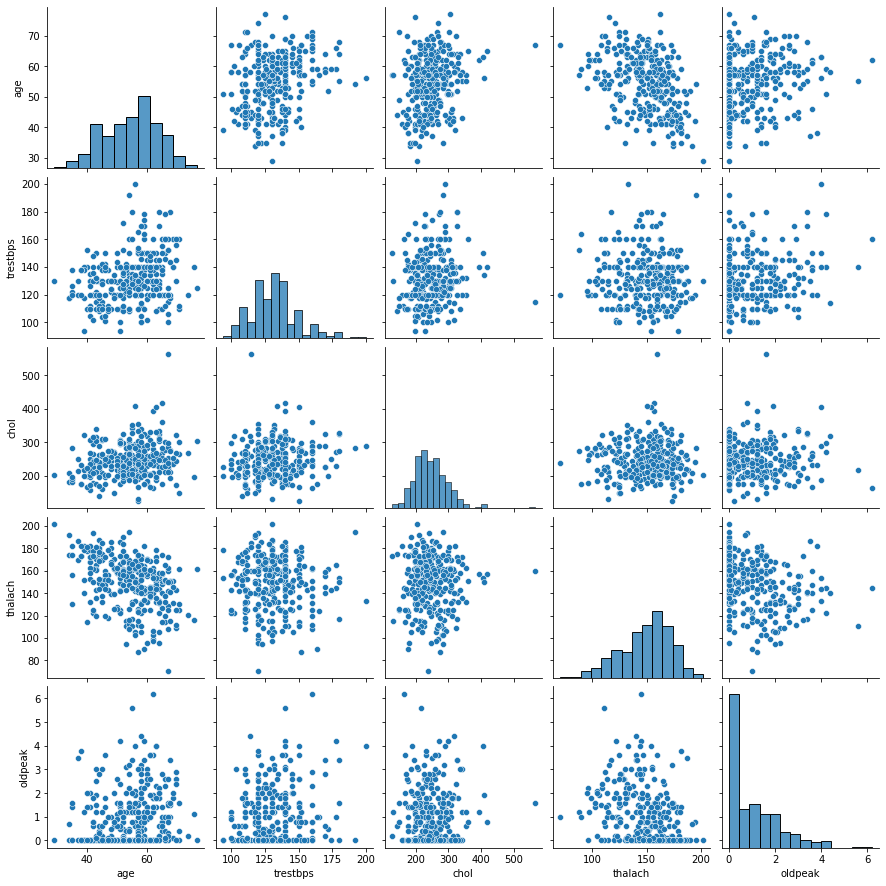

In [12]:
# Using pairplots to see the continuous columns variable correlation
data1 = data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(data1)
plt.show()

<b>Outlier Detection</b>

*Since the dataset is not large, we cannot discard the outliers. We will treat the outliers as potential observations.*

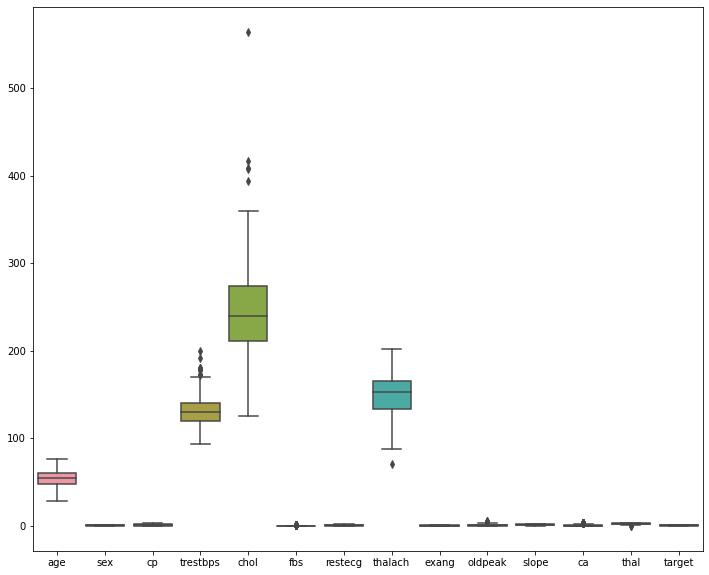

In [13]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(data=data, ax=ax)
plt.show()

<b>Handling Imbalance</b>

Imbalance in a dataset leads to inaccuracy and high precision, recall scores. There are certain resampling techniques such as undersampling and oversampling to handle these issues.

Considering our dataset, the response variable target has two outcomes "Patients with Heart Disease" and "Patients without Heart Disease". Let us now observe their distribution in the dataset.

In [14]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

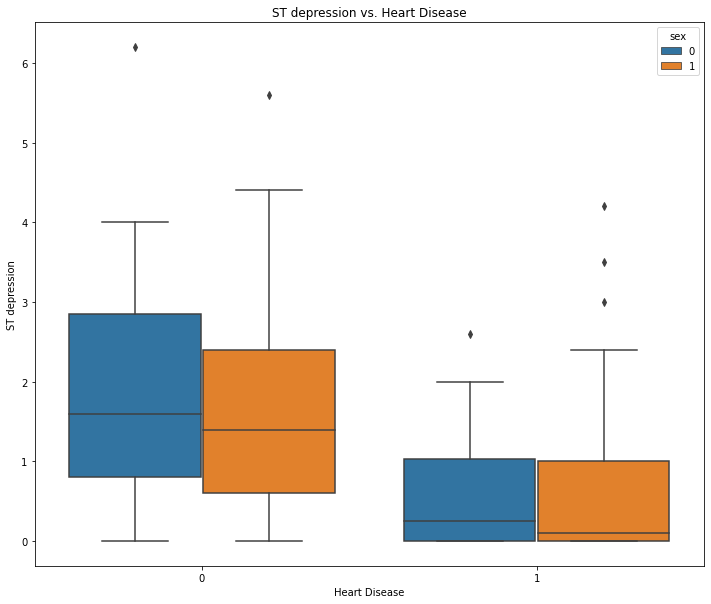

In [15]:
# To study ST depression relationship with heart disease in reference to male and female
plt.figure(figsize=(12, 10))
sns.boxplot(x="target", y="oldpeak", hue="sex", data=data);
plt.title('ST depression vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('ST depression')
plt.show()

Heart disease Positive patients exhibit a lowered median for ST depression level, while negative patients have higher levels.
No much differences between male & female target outcomes, expect for the fact that males have slightly larger ranges of ST Depression

Relationship between age and heart disease

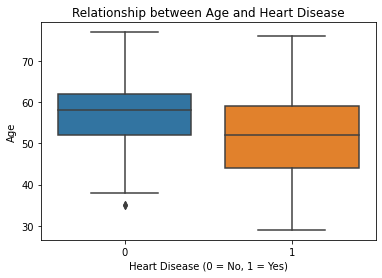

In [16]:
sns.boxplot(x='target', y='age', data=data)

# Add labels and title
plt.title('Relationship between Age and Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')

# Show the plot
plt.show()

Relationship between gender and heart disease

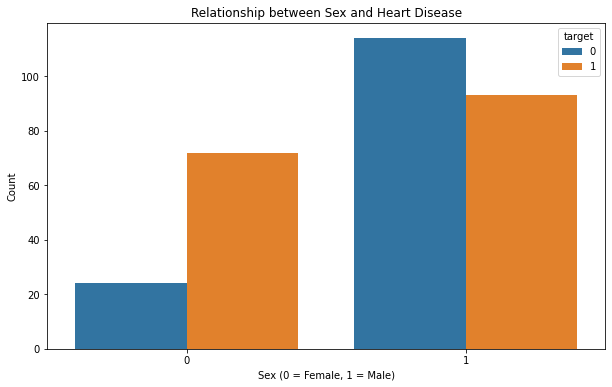

In [17]:
plt.figure(figsize=(10, 6))

# Count plot to show the distribution of sex for each target class
sns.countplot(x='sex', hue='target', data=data)

# Add labels and title
plt.title('Relationship between Sex and Heart Disease')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')

# Show the plot
plt.show()

The above chart depicts Male are more prone to heart diseases than females

Relationship between cholestrol levels and heart disease

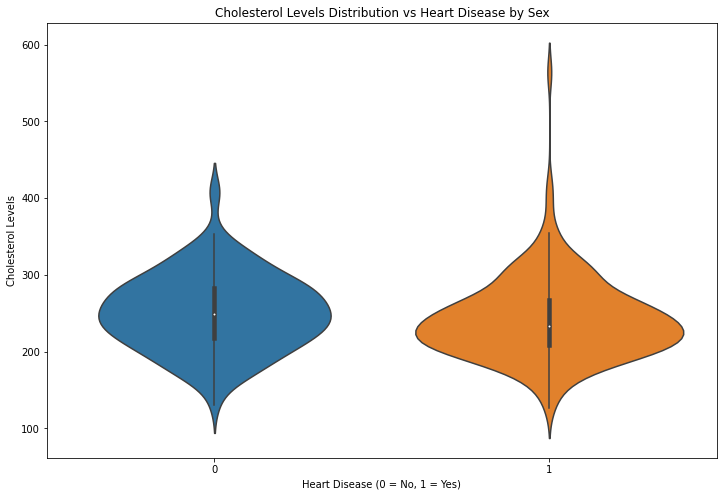

In [18]:
plt.figure(figsize=(12, 8))

# Violin plot to show cholesterol distribution for each target class and by sex
sns.violinplot(x='target', y='chol', data=data)

# Add labels and title
plt.title('Cholesterol Levels Distribution vs Heart Disease by Sex')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels')

plt.show()

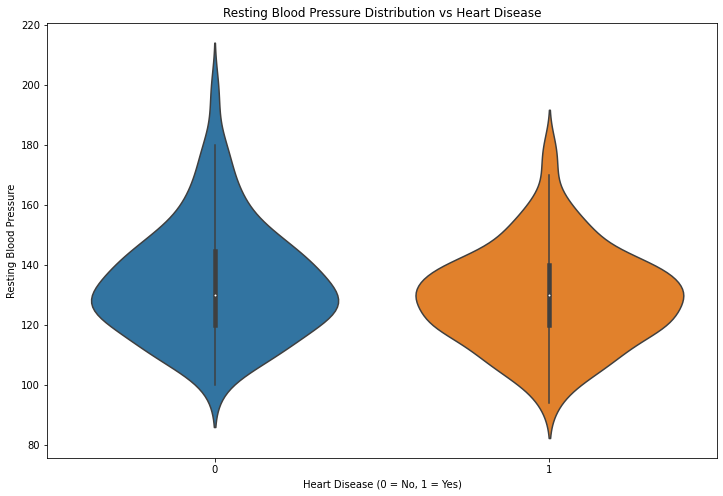

In [19]:
plt.figure(figsize=(12, 8))

# Violin plot to show resting blood pressure distribution for heart disease status
sns.violinplot(x='target', y='trestbps', data=data)

# Add labels and title
plt.title('Resting Blood Pressure Distribution vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure')

plt.show()

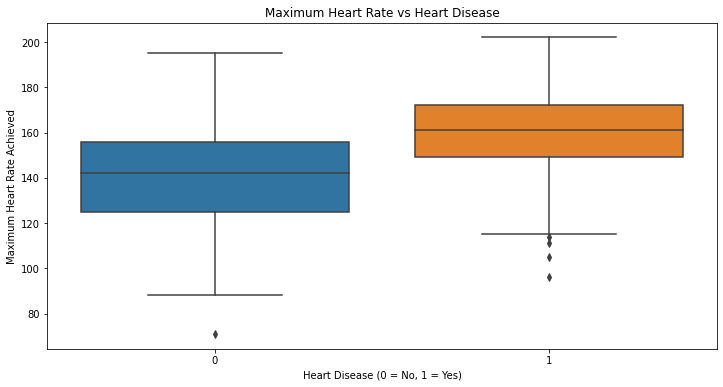

In [20]:

# Boxplot for Maximum Heart Rate vs Heart Disease
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='thalach', data=data)
plt.title('Maximum Heart Rate vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

People with heart disease had highest heart rate 

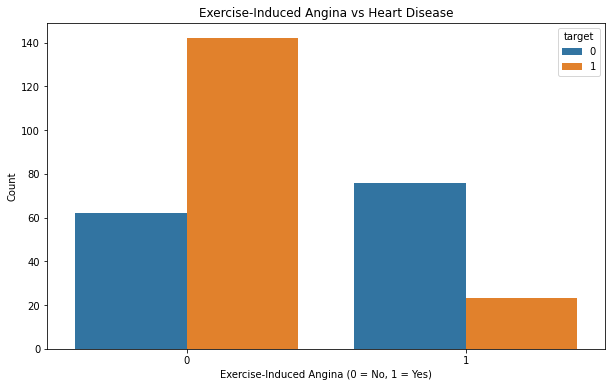

In [21]:
# Count Plot for Exercise-Induced Angina vs Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(x='exang', hue='target', data=data)
plt.title('Exercise-Induced Angina vs Heart Disease')
plt.xlabel('Exercise-Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
# Defining X and Y for modeling
X = data.drop("target",axis=1)
y = data["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=7)

In [24]:
#Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred = lr.predict(X_test)
r2_test = lr.score(X_test,y_test)
print(f"R-squared on testing data: {r2_test}")
r2_train= lr.score(X_train,y_train)
print(f"R-squared on training data: {r2_train}")

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Accuracy on Test data
accuracy_score(y_test, pred)

In [ ]:
# Accuracy on Train data
accuracy_score(y_train, lr.predict(X_train))

<b>Building a predictive system</b>

In [ ]:
import warnings
in_data = (57,0,0,140,241,0,1,123,1,0.2,1,0,3)

# Changing the input data into a numpy array
in_data_as_numpy_array = np.array(in_data)

# Reshaping the numpy array as we predict it
in_data_reshape = in_data_as_numpy_array.reshape(1,-1)
pred = lr.predict(in_data_reshape)
print(pred)

if(pred[0] == 0):
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')